In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
#load data
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor")

data = "data.csv"
df =  pd.read_csv(data)

In [3]:
df

,userId,incrementalId,POIId,weekday,hour,minutes_spent,stop_type,name1_fs,name2_fs
0,0,1,NaN,4,0,1881.216667,home,NaN,NaN
1,0,2,NaN,5,8,40.400000,other,NaN,NaN
2,0,3,1.202591e+12,5,10,77.350000,poi,Shop & Service,Tailor Shop
3,0,4,NaN,5,11,376.450000,home,NaN,NaN
4,0,5,1.202591e+12,5,18,5.216667,poi,Shop & Service,Tailor Shop
...,...,...,...,...,...,...,...,...,...
20071654,403726927905,61,NaN,6,8,5.083333,home,NaN,NaN
20071655,403726927905,62,1.537598e+12,6,9,63.316667,poi,Professional & Other Places,School
20071656,403726927905,63,NaN,6,11,233.016667,home,NaN,NaN
20071657,403726927905,64,NaN,6,18,1609.166667,home,NaN,NaN


In [4]:
#10 most visited points of interst
mostVisited = df[df.stop_type == 'poi'][['POIId', 'userId', 'name1_fs', 'name2_fs']].groupby(['POIId', 'name1_fs', 'name2_fs']).count()['userId'].nlargest(10)

In [5]:
#10 most visited points of interest
dfMostVisited = (pd.DataFrame(data=mostVisited).reset_index())
dfMostVisited

,POIId,name1_fs,name2_fs,userId
0,6.957847e+11,Travel & Transport,Airport,8651
1,1.717987e+10,Travel & Transport,Airport,8252
2,3.435974e+10,Travel & Transport,Train Station,8038
3,5.153961e+10,Travel & Transport,Airport,5964
4,1.030792e+12,Shop & Service,Shopping Mall,5412
5,1.417339e+12,Shop & Service,Shopping Mall,4902
6,3.350074e+11,Travel & Transport,Airport,4697
7,5.239860e+11,Arts & Entertainment,Casino,4434
8,4.380867e+11,Travel & Transport,Train Station,4375
9,4.380867e+11,Shop & Service,Warehouse Store,4110


In [6]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

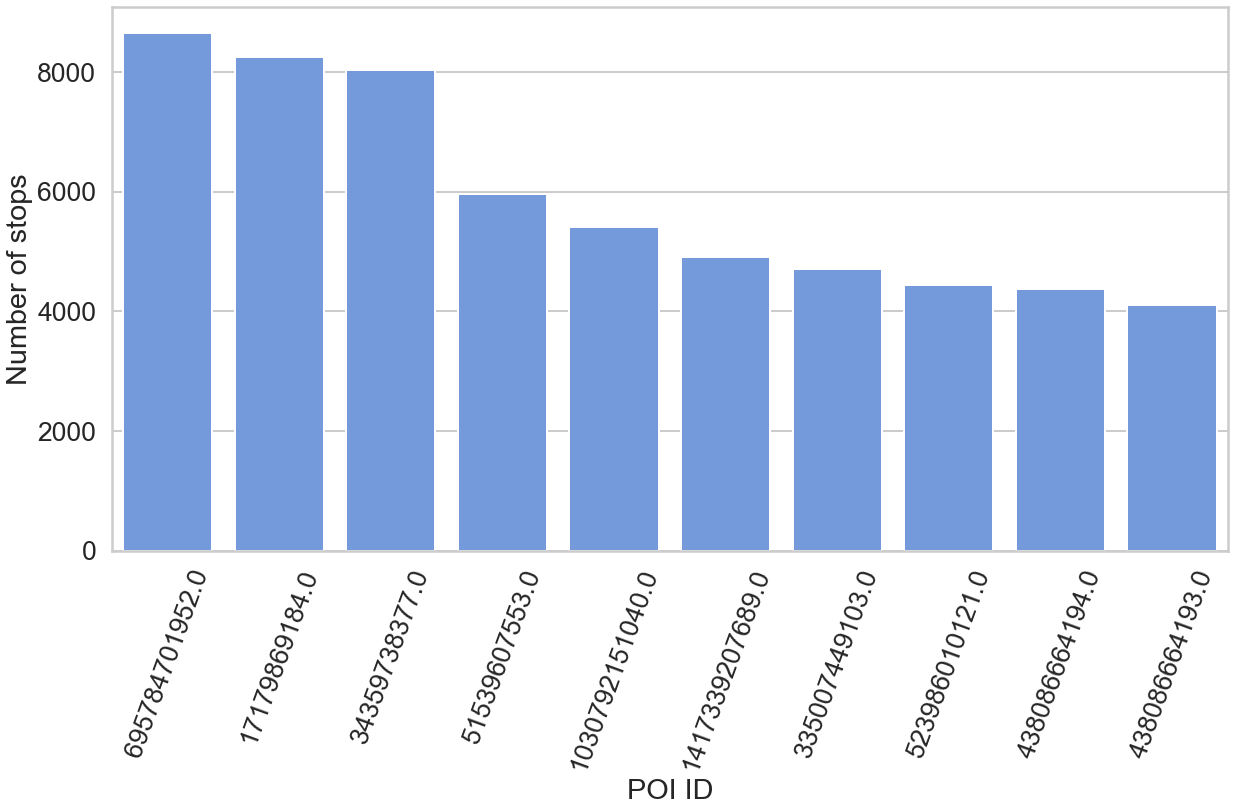

In [7]:
#This plot shows how many visits the most visited POIs has
sns.barplot(x = 'POIId', y = 'userId', data=dfMostVisited, order=dfMostVisited['POIId'], color = 'cornflowerblue')
plt.xlabel('POI ID')
plt.xticks(rotation=70)
plt.ylabel('Number of stops')
plt.savefig('poiPlotMost.png', bbox_inches='tight')
plt.show()

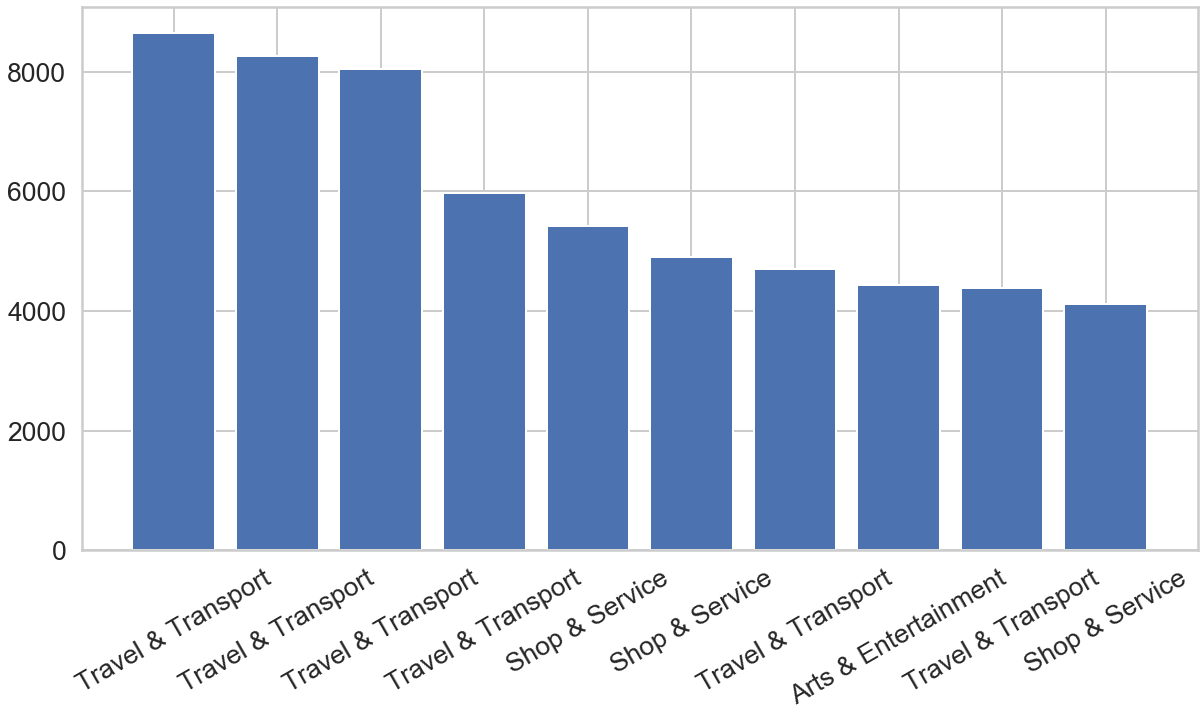

In [8]:
#This plot shows the number of visits and which category for name1 the POI is
 
# create a dataset
#height = [3, 12, 5, 18, 45]
height = dfMostVisited['userId'].tolist()
bars = dfMostVisited['name1_fs'].tolist()
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height)
#color=['black', 'black', 'black', 'black', 'red', 'black', 'red', 'blue', 'black', 'pink'])

# Create names on the x-axis
plt.xticks(x_pos, bars, rotation = 30)

# Save graph
plt.savefig('poiPlotName1.png', bbox_inches='tight')

# Show graph
plt.show()

In [9]:
dfMostVisited

,POIId,name1_fs,name2_fs,userId
0,6.957847e+11,Travel & Transport,Airport,8651
1,1.717987e+10,Travel & Transport,Airport,8252
2,3.435974e+10,Travel & Transport,Train Station,8038
3,5.153961e+10,Travel & Transport,Airport,5964
4,1.030792e+12,Shop & Service,Shopping Mall,5412
5,1.417339e+12,Shop & Service,Shopping Mall,4902
6,3.350074e+11,Travel & Transport,Airport,4697
7,5.239860e+11,Arts & Entertainment,Casino,4434
8,4.380867e+11,Travel & Transport,Train Station,4375
9,4.380867e+11,Shop & Service,Warehouse Store,4110


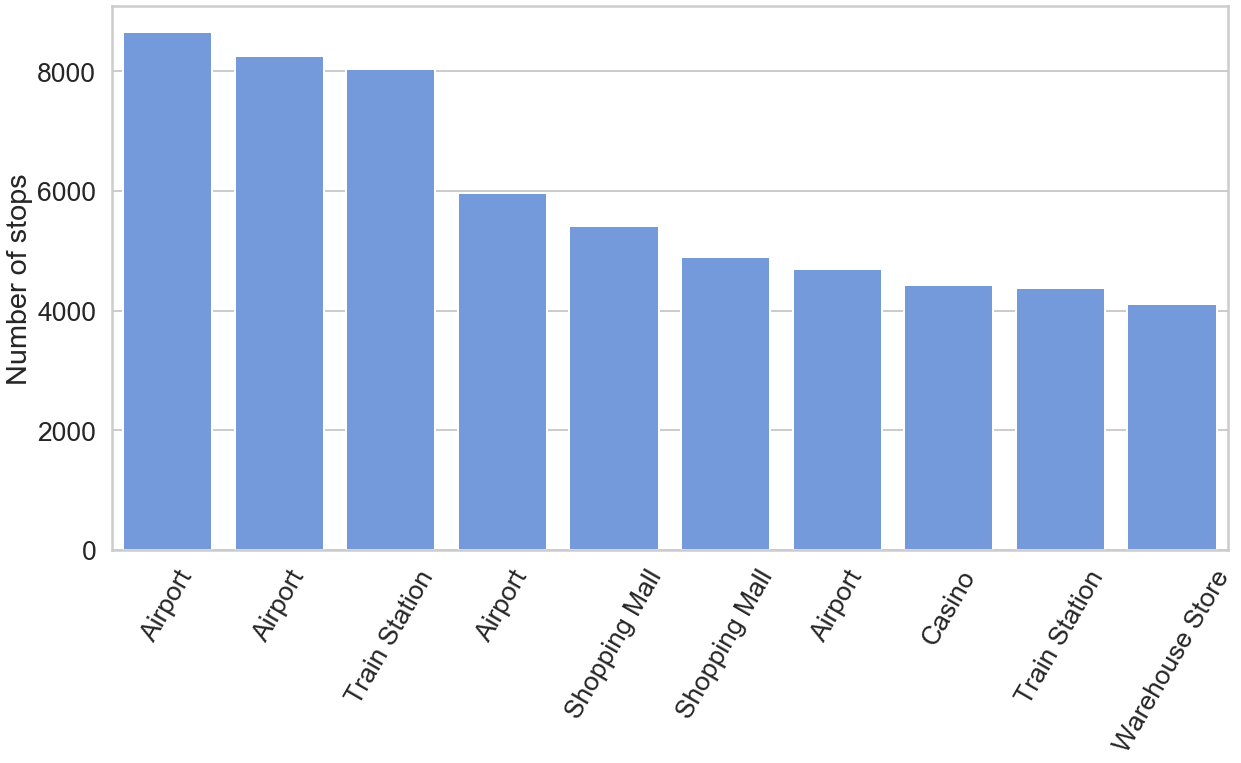

In [10]:
#This plot show the number of visits with the sub category indicated
ax = sns.barplot(x = 'POIId', y = 'userId', data=dfMostVisited, order=dfMostVisited['POIId'], color = 'cornflowerblue')
ax.set_xticklabels(list(dfMostVisited['name2_fs'].values))
ax.set(xlabel=None)
plt.xticks(rotation=60)
plt.ylabel('Number of stops')
plt.savefig('poiPlotName2.png', bbox_inches='tight')
plt.show()

In [11]:
#category and subcategory for the 10 most visied POIs
mostVisitN1 = dfMostVisited.groupby('name1_fs').count()['POIId'].reset_index()
mostVisitN2 = dfMostVisited.groupby('name2_fs').count()['POIId'].reset_index()

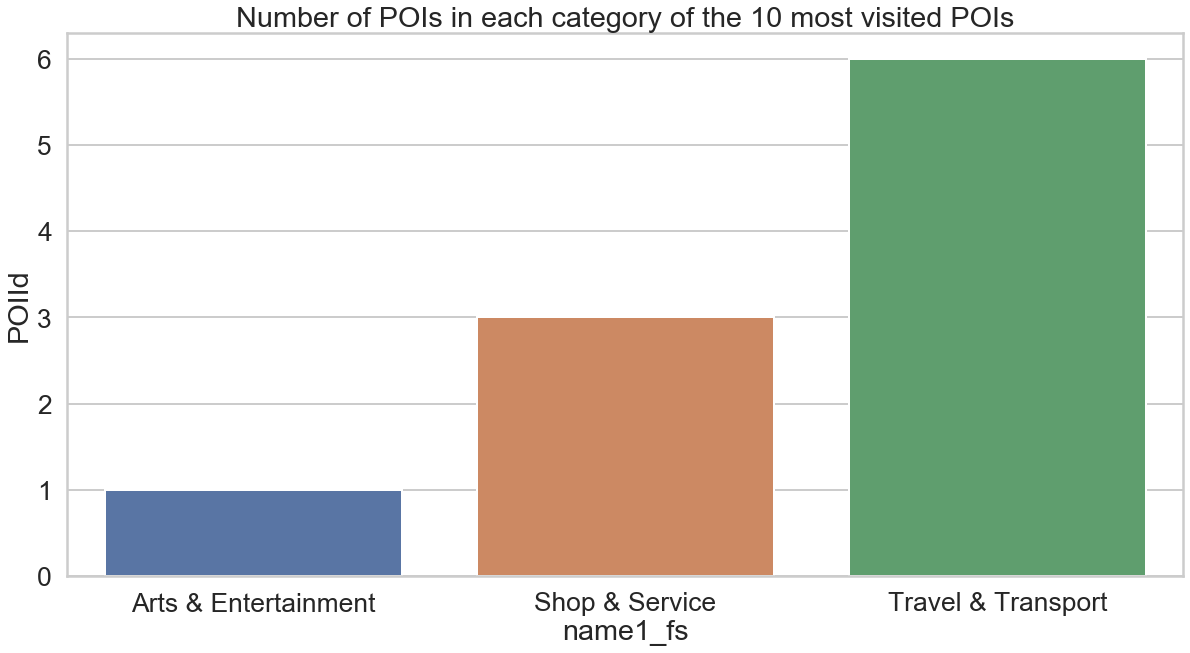

In [12]:
#This plot shows how many POIs that are in each category
sns.barplot(x = 'name1_fs', y = 'POIId', data=mostVisitN1).set(title='Number of POIs in each category of the 10 most visited POIs')
plt.show()

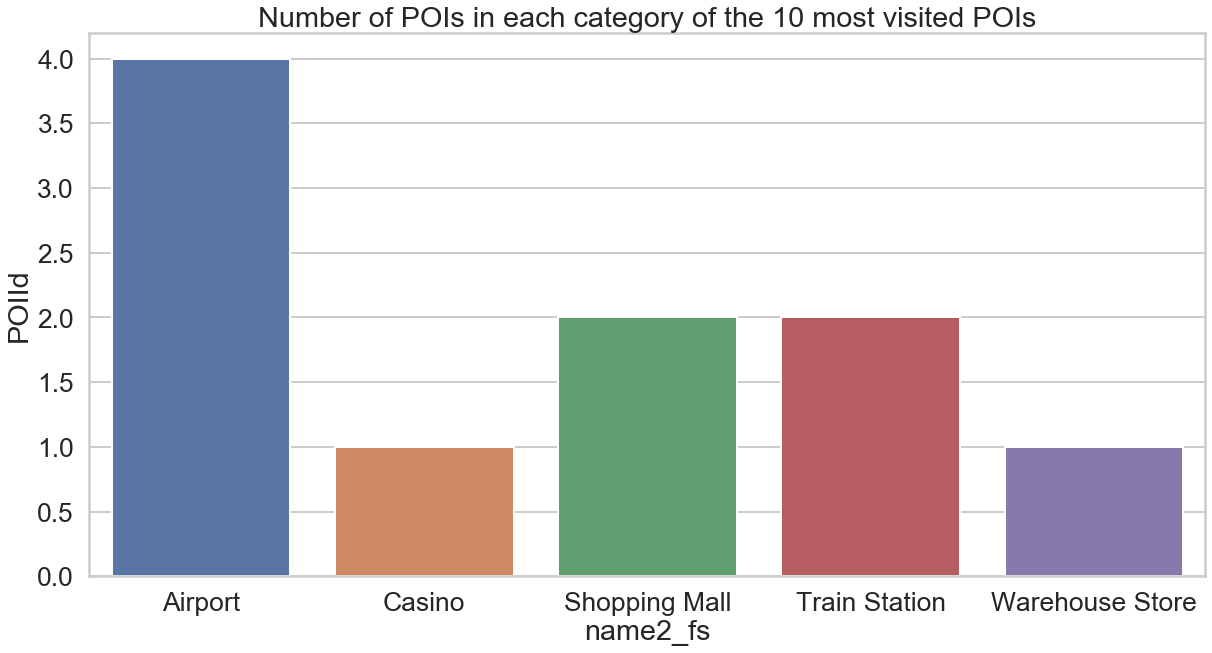

In [13]:
#This plot shows how many POIs that are in each subcategory
sns.barplot(x = 'name2_fs', y = 'POIId', data=mostVisitN2).set(title='Number of POIs in each category of the 10 most visited POIs')
plt.show()

In [14]:
#most visited category and subcategory of POIs
mostVisitCat1 = df[df.stop_type == 'poi'].groupby('name1_fs').count()['userId'].reset_index()
mostVisitCat2 = df[df.stop_type == 'poi'].groupby('name2_fs').count()['userId'].nlargest(20).reset_index()

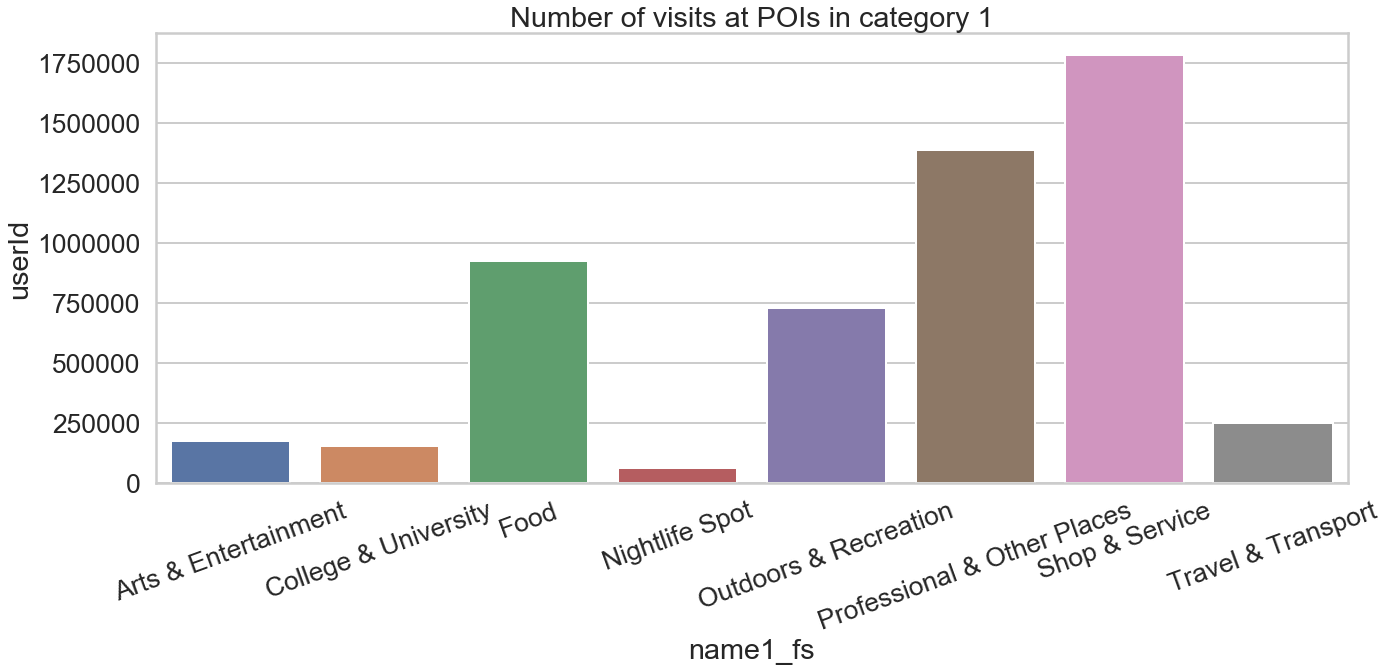

In [15]:
#This plot shows how many visits there are at each category of the POIs
sns.barplot(x = 'name1_fs', y = 'userId', data=mostVisitCat1).set(title='Number of visits at POIs in category 1')
plt.xticks(rotation=20)
plt.tight_layout()

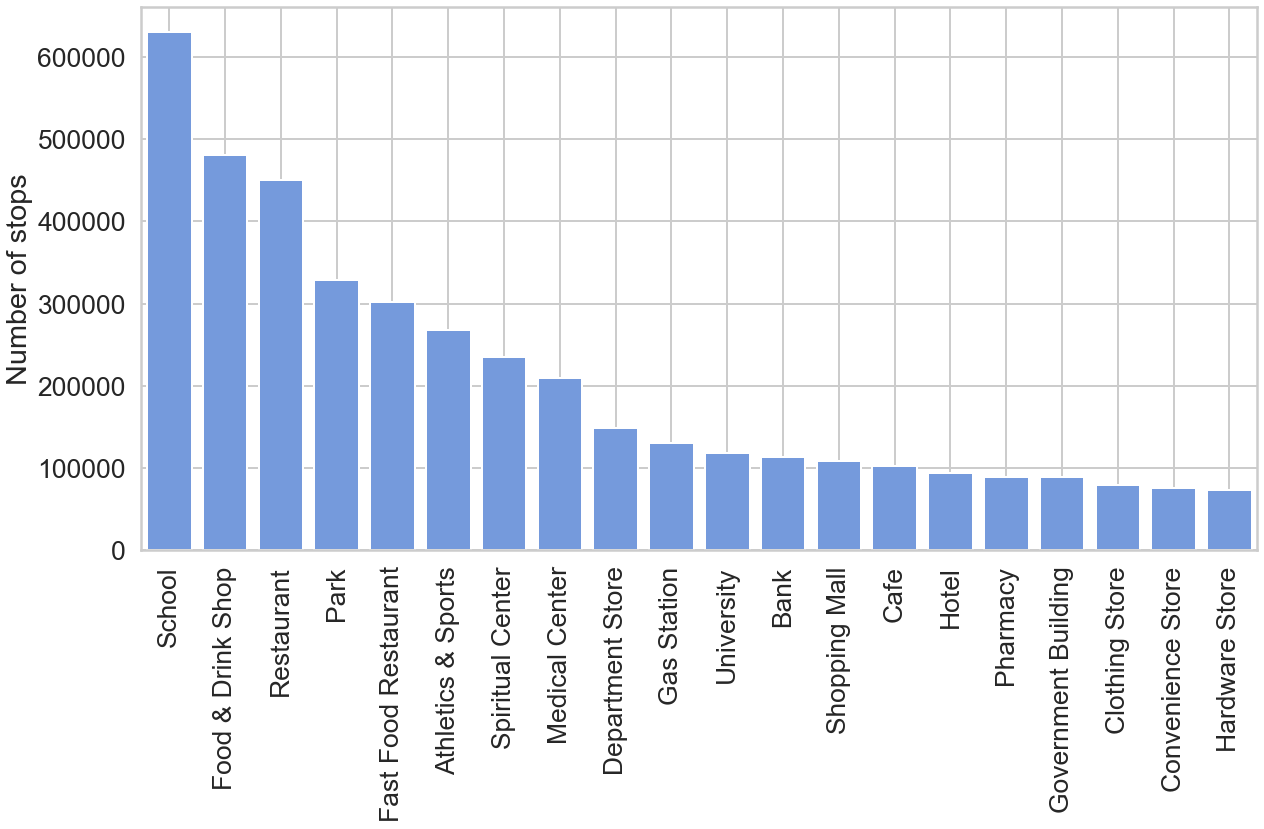

In [16]:
#number of visits at the subcategory for the pois, for the 20 most visited sub categories
ax=sns.barplot(x = 'name2_fs', y = 'userId', data=mostVisitCat2, color = 'cornflowerblue')
ax.set(xlabel=None)
plt.xticks(rotation=90)
plt.ylabel('Number of stops')
plt.grid(visible=True)
plt.savefig('POIN2Most.png', bbox_inches='tight')#Save plot
plt.show() #Show graph

In [17]:
#all pois, that have the least number of visits
leastVisited = df[df.stop_type == 'poi'][['POIId', 'userId', 'name1_fs', 'name2_fs']].groupby(['POIId', 'name1_fs', 'name2_fs']).count()['userId'].nsmallest(9640)
dfLeastVisited = pd.DataFrame(data=leastVisited).reset_index()
dfLeastVisited

,POIId,name1_fs,name2_fs,userId
0,2.240000e+02,Professional & Other Places,Factory,1
1,2.290000e+02,Shop & Service,Clothing Store,1
2,2.720000e+02,Outdoors & Recreation,Athletics & Sports,1
3,2.780000e+02,Travel & Transport,Bike Rental / Bike Share,1
4,2.980000e+02,Food,Restaurant,1
...,...,...,...,...
9635,1.692217e+12,Shop & Service,Laundry Service,1
9636,1.692217e+12,Outdoors & Recreation,Athletics & Sports,1
9637,1.692217e+12,Travel & Transport,Bike Rental / Bike Share,1
9638,1.692217e+12,Professional & Other Places,Warehouse,1


In [18]:
leastVisitN1 = dfLeastVisited.groupby('name1_fs').count()['userId'].reset_index()
leastVisitN2 = dfLeastVisited.groupby('name2_fs').count()['userId'].reset_index()

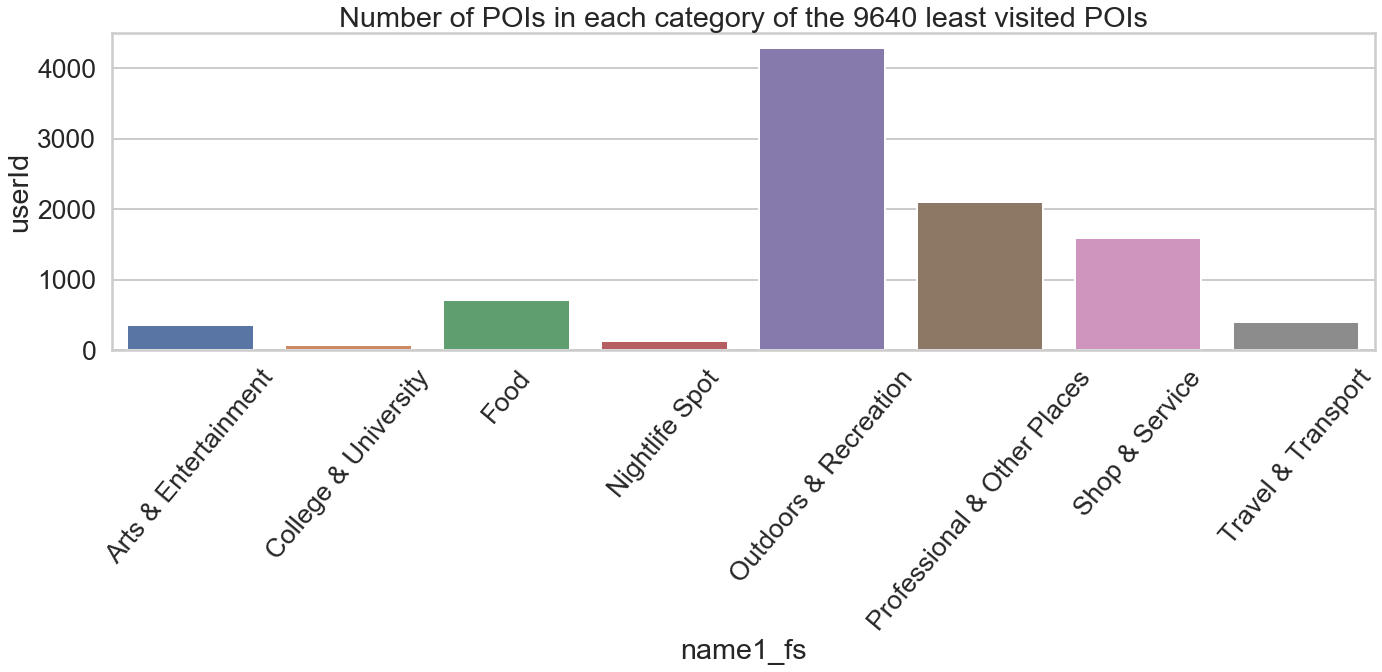

In [19]:
#Number of least visited POIs in each category
sns.barplot(x = 'name1_fs', y = 'userId', data=leastVisitN1).set(title='Number of POIs in each category of the 9640 least visited POIs')
plt.xticks(rotation=50)
plt.tight_layout()

In [20]:
#Number of visits at each POI at each day of the week
df[df.stop_type == 'poi'].groupby(['weekday', 'POIId']).count()['userId'].unstack()

POIId,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.709397e+12,1.709397e+12,1.709397e+12,1.709397e+12,1.709397e+12,1.709397e+12,1.709397e+12,1.709397e+12,1.709397e+12,1.709397e+12
weekday,,,,,,,,,,,,,,,,,,,,,
1,265.0,83.0,131.0,41.0,231.0,23.0,206.0,5.0,80.0,23.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,154.0,67.0,91.0,64.0,174.0,21.0,120.0,3.0,62.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123.0,51.0,70.0,47.0,183.0,18.0,160.0,2.0,39.0,17.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148.0,59.0,129.0,52.0,189.0,29.0,97.0,6.0,50.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,134.0,58.0,116.0,69.0,230.0,24.0,112.0,12.0,41.0,20.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
6,162.0,75.0,146.0,74.0,227.0,43.0,198.0,11.0,51.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,251.0,84.0,196.0,66.0,334.0,34.0,332.0,4.0,69.0,18.0,...,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN


In [21]:
#number of visits at each category of poi at each weekday
weekVisit = df[df.stop_type == 'poi'].groupby(['weekday', 'name1_fs']).count()['userId'].unstack()
weekVisit

name1_fs,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
weekday,,,,,,,,
1,25446,10502,119009,7974,99461,145194,252855,29200
2,17180,25033,102657,6066,90580,182955,214407,29463
3,18982,26731,104146,6691,89659,204800,201846,31447
4,21608,27845,121508,7837,102228,221679,233706,36081
5,21671,27748,128656,8570,102210,226780,244854,38361
6,30121,22121,166688,11864,116482,228893,289184,44075
7,43003,16066,183938,14566,130126,180644,349777,44226


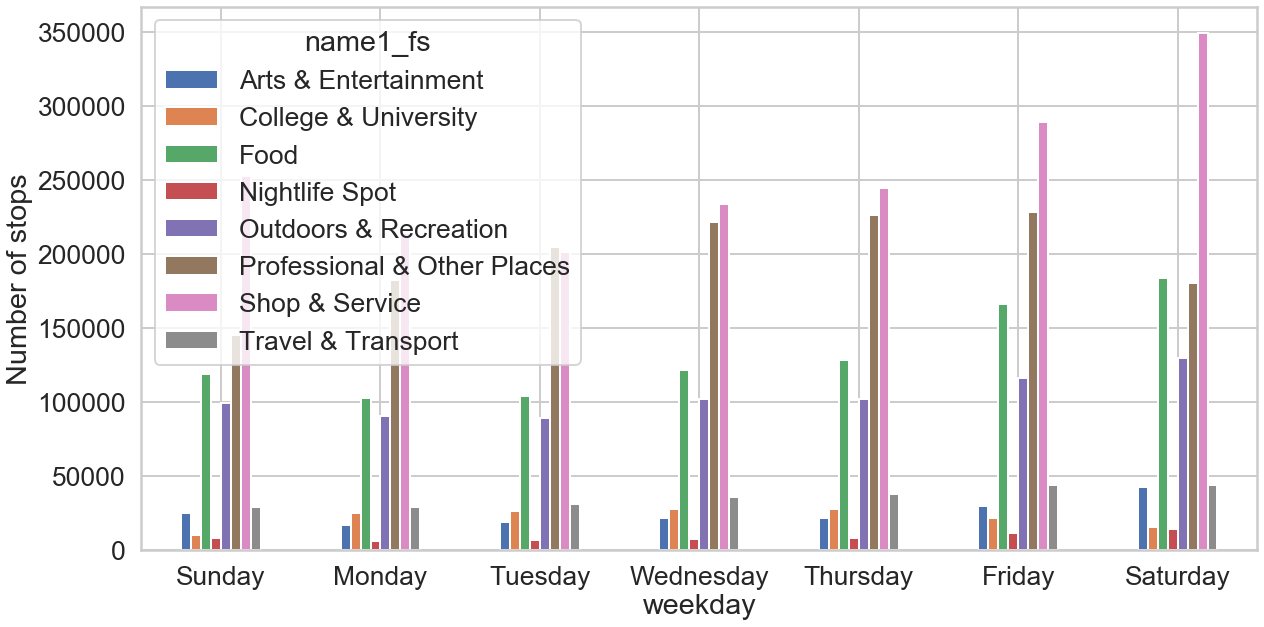

In [22]:
ax = weekVisit.plot.bar()
plt.xticks(rotation = 0)
plt.ylabel('Number of stops')
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.savefig('weekVisit.png', bbox_inches='tight')
plt.show()

In [23]:
#subcategory within  College & University
df[df.name1_fs == 'College & University']['name2_fs'].unique().tolist()

['University', 'College Academic Building']

In [24]:
#subcategory within  Outdoors & Recreation
df[df.name1_fs == 'Outdoors & Recreation']['name2_fs'].unique().tolist()

['Beach',
 'Athletics & Sports',
 'Park',
 'Garden',
 'Castle',
 'Cemetery',
 'Campground',
 'Pool',
 'Playground',
 'Plaza',
 'Harbor / Marina',
 'Recreation Center',
 'Summer Camp',
 'Stables',
 'Lighthouse',
 'Mountain Hut',
 'Bathing Area',
 'Windmill']

In [25]:
#subcategory within  Professional & Other Places
df[df.name1_fs == 'Professional & Other Places']['name2_fs'].unique().tolist()

['School',
 'Government Building',
 'Medical Center',
 'Funeral Home',
 'Spiritual Center',
 'Post Office',
 'Library',
 'Monument / Landmark',
 'Office',
 'Building',
 'Warehouse',
 'Community Center',
 'Industrial Estate',
 'Prison',
 'Factory',
 'Power Plant',
 'Observatory',
 'Non-Profit',
 'Convention Center',
 'Laboratory',
 'Winery',
 'Cultural Center',
 'Waste Facility',
 'Distillery']

In [26]:
df[df.name1_fs == 'Travel & Transport']['name2_fs'].unique().tolist()

['Hotel',
 'Airport',
 'Train Station',
 'Rental Car Location',
 'Bike Rental / Bike Share',
 'Pier',
 'Boat or Ferry',
 'Tourist Information Center',
 'Transportation Service',
 'Boat Rental',
 'Port']

In [27]:
hourVisit = df[df.stop_type == 'poi'].groupby(['hour', 'name1_fs']).count()['userId'].unstack()

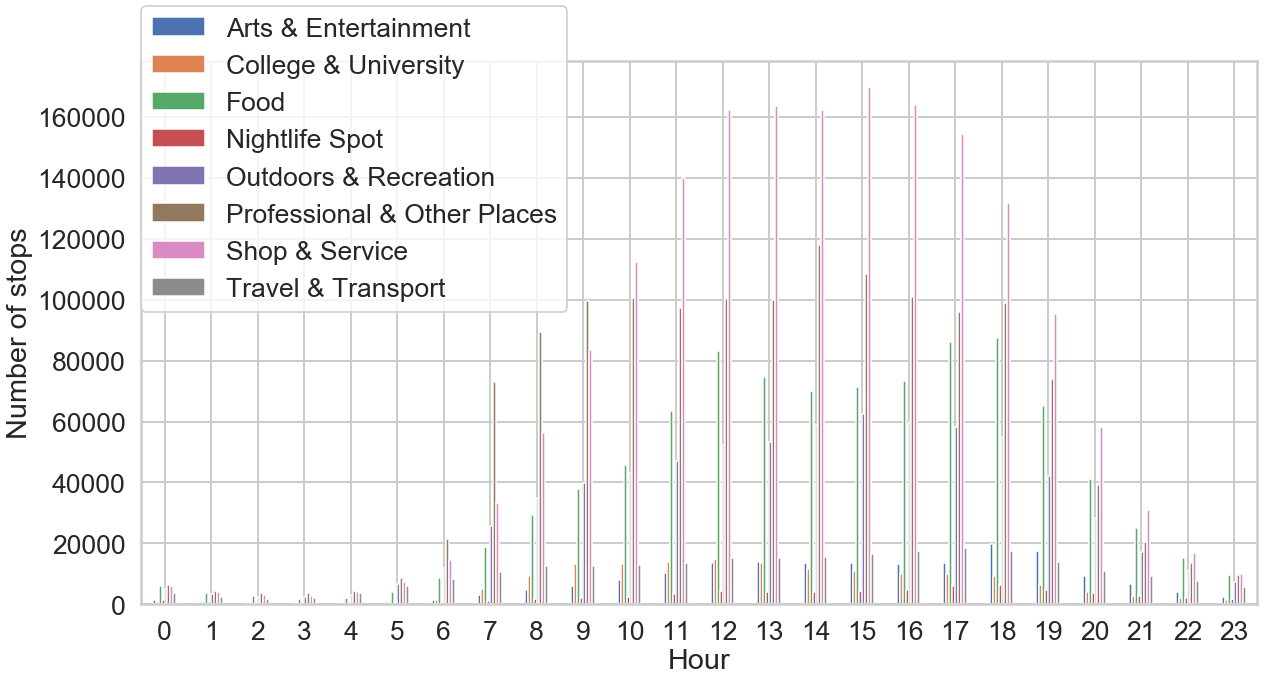

In [28]:
hourVisit.plot.bar(linewidth = 1.5)
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor=(0, 1.1), loc='upper left', borderaxespad=0)
plt.xlabel('Hour')
plt.ylabel('Number of stops')
plt.savefig('hourVisit.png', bbox_inches='tight')
plt.show()

In [29]:
hourVisit

name1_fs,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
hour,,,,,,,,
0,1353,905,5909,1356,4974,6234,6159,3623
1,837,650,3753,709,3342,4480,4049,2398
2,584,468,2600,377,2358,3755,3029,1769
3,450,321,1850,276,2255,3616,2815,2146
4,422,297,2142,203,3028,4365,3912,3674
5,650,623,4158,369,6608,8657,7382,6035
6,1337,1369,8571,531,11845,21559,14473,8277
7,2894,4949,18659,1110,25702,72938,33163,10768
8,4532,9325,29359,1777,34823,89339,56405,12630


In [30]:
#Most visited 
for h in range(0,len(hourVisit)):
    print(h,":", np.argmax(hourVisit.iloc[h,:]))

0 : 5
1 : 5
2 : 5
3 : 5
4 : 5
5 : 5
6 : 5
7 : 5
8 : 5
9 : 5
10 : 6
11 : 6
12 : 6
13 : 6
14 : 6
15 : 6
16 : 6
17 : 6
18 : 6
19 : 6
20 : 6
21 : 6
22 : 6
23 : 6
